In [1]:
'''This is to test with the sdss spec and potentially try
some new higher res spectral templates = Indo-US?'''

'This is to test with the sdss spec and potentially try\nsome new higher res spectral templates = Indo-US?'

In [63]:
import pyfits
import matplotlib.pyplot as plt

import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare
import matplotlib.patches as patches
from astropy.io import fits


from astropy.cosmology import WMAP9 as cosmo

import pyfits
import matplotlib.pyplot as plt

import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare
import matplotlib.patches as patches

import sys 

sys.path.append('/usr/local/lib/python2.7/site-packages/ppxf')
sys.path

from __future__ import print_function

from astropy.io import fits
import numpy as np
import glob
from time import clock
from os import path

from ppxf import ppxf
import ppxf_util as util
plt.clf()




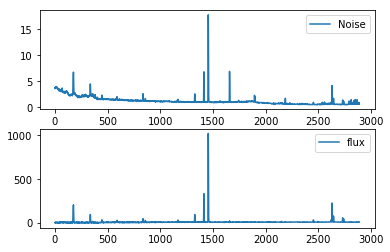

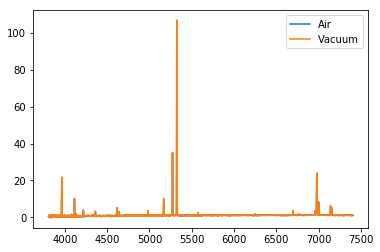

wdisp 2891 lam_gal 2891


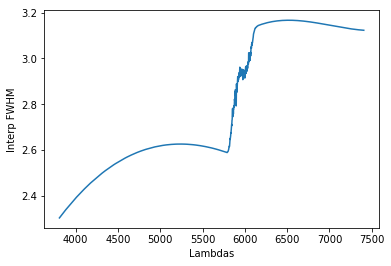

velscale 69.1451441267
<class 'list'>
(1,)


TypeError: expected str, bytes or os.PathLike object, not list

In [64]:
#y=ppxf_example_kinematics_sdss()
y=ppxf_miles()
def gauss_1(x,*p):
    A, mu, sigma, slope, height=p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))+slope*x+height

lams=y[0]
gals=y[1]
err=y[2]
print(err)

In [18]:

redshift_J1354 = 0.0633581002031

redshift_J1354_e = 5.63444982043e-05




c=2.99792458e5
red_vel=c*np.log(1 + redshift_J1354)

v_err_1=redshift_J1354_e/redshift_J1354*red_vel

print('error on MHU',red_vel, v_err_1)


print(( 18526    -red_vel))
#18453 = sdss
#18240 = PA 1
#18404 = PA 2
#18162 = PA 3

'''So the redshift should be given by:
z_stars=exp(all.VEL_STARS/ckm)-1.d0'''
z_stars=np.exp( 18526     /c)-1
print('z_stars from sol', z_stars)





error on MHU 18416.8261719 16.3781241206
109.17382812
z_stars from sol 0.0637454081958


In [21]:



from __future__ import print_function

from astropy.io import fits
from scipy import ndimage
import numpy as np
from time import clock
import glob
from os import path

from ppxf import ppxf
import ppxf_util as util


def ppxf_example_kinematics_sdss():

    file_dir = '/usr/local/Cellar/python/2.7.6/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ppxf'  # path of this procedure
    
    # Read SDSS DR12 galaxy spectrum taken from here http://dr12.sdss3.org/
    # The spectrum is *already* log rebinned by the SDSS DR12
    # pipeline and log_rebin should not be used in this case.
    file = '../spec-1777-53857-0076.fits'
    hdu = fits.open(file)
   
    t = hdu['COADD'].data
    z = 0.0637454081958   # SDSS redshift estimate
    

    # The SDSS wavelengths are in vacuum, while the MILES ones are in air.
    # For a rigorous treatment, the SDSS vacuum wavelengths should be
    # converted into air wavelengths and the spectra should be resampled.
    # To avoid resampling, given that the wavelength dependence of the
    # correction is very weak, I approximate it with a constant factor.
    #
    

    # Only use the wavelength range in common between galaxy and stellar library.
    mask = (t['loglam'] > np.log10(3540)) & (t['loglam'] < np.log10(7409))
    flux = t['flux'][mask]
    var = 1/np.sqrt(t['ivar'][mask])
    var_scaled=var/np.median(flux)
    fig=plt.figure()
    ax1=fig.add_subplot(2,1,1)
    ax1.plot(var, label='Noise')
    plt.legend()
    ax2=fig.add_subplot(2,1,2)
    ax2.plot(flux, label='flux')
    plt.legend()
    plt.show()
    galaxy = flux/np.median(flux)   # Normalize spectrum to avoid numerical issues
    loglam_gal = t['loglam'][mask]
    lam_gal = 10**loglam_gal
    lam_gal_vac = lam_gal

   
    lam_gal *= np.median(util.vac_to_air(lam_gal)/lam_gal)
    #lam_gal = util.vac_to_air(lam_gal)
    
    plt.plot(lam_gal, galaxy, label='Air')
    plt.plot(lam_gal_vac, galaxy, label='Vacuum')
    plt.legend()
    plt.show()
    
    noise = np.full_like(galaxy, 0.0166)       # Assume constant noise per pixel here
    noise = var_scaled

    c = 299792.458                  # speed of light in km/s
    frac = lam_gal[1]/lam_gal[0]    # Constant lambda fraction per pixel
    dlam_gal = (frac - 1)*lam_gal   # Size of every pixel in Angstrom
    wdisp = t['wdisp'][mask]        # Intrinsic dispersion of every pixel, in pixels units
    print('wdisp',len(wdisp), 'lam_gal', len(lam_gal))
    fwhm_gal = 2.355*wdisp*dlam_gal # Resolution FWHM of every pixel, in Angstroms
    
    plt.plot(lam_gal, fwhm_gal)
    plt.xlabel('Lambdas')
    plt.ylabel('Interp FWHM')
    plt.show()
    
    
    velscale = np.log(frac)*c       # Constant velocity scale in km/s per pixel
    print('velscale', velscale)
    # If the galaxy is at a significant redshift (z > 0.03), one would need to apply
    # a large velocity shift in PPXF to match the template to the galaxy spectrum.
    # This would require a large initial value for the velocity (V > 1e4 km/s)
    # in the input parameter START = [V,sig]. This can cause PPXF to stop!
    # The solution consists of bringing the galaxy spectrum roughly to the
    # rest-frame wavelength, before calling PPXF. In practice there is no
    # need to modify the spectrum in any way, given that a red shift
    # corresponds to a linear shift of the log-rebinned spectrum.
    # One just needs to compute the wavelength range in the rest-frame
    # and adjust the instrumental resolution of the galaxy observations.
    # This is done with the following three commented lines:
    #
    #lam_gal = lam_gal/(1+z)  # Compute approximate restframe wavelength
    #fwhm_gal = fwhm_gal/(1+z)   # Adjust resolution in Angstrom

    # Read the list of filenames from the Single Stellar Population library
    # by Vazdekis (2010, MNRAS, 404, 1639) http://miles.iac.es/. A subset
    # of the library is included for this example with permission
    vazdekis = glob.glob(file_dir + '/miles_models/Mun1.30Z*.fits')
    fwhm_tem = 2.51 # Vazdekis+10 spectra have a constant resolution FWHM of 2.51A.

    # Extract the wavelength range and logarithmically rebin one spectrum
    # to the same velocity scale of the SDSS galaxy spectrum, to determine
    # the size needed for the array which will contain the template spectra.
    #
    hdu = fits.open(vazdekis[0])
    ssp = hdu[0].data
    h2 = hdu[0].header
    lam_temp = h2['CRVAL1'] + h2['CDELT1']*np.arange(h2['NAXIS1'])
    lamRange_temp = [np.min(lam_temp), np.max(lam_temp)]
    sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale)[0]
    templates = np.empty((sspNew.size, len(vazdekis)))

    # Interpolates the galaxy spectral resolution at the location of every pixel
    # of the templates. Outside the range of the galaxy spectrum the resolution
    # will be extrapolated, but this is irrelevant as those pixels cannot be
    # used in the fit anyway.
    fwhm_gal = np.interp(lam_temp, lam_gal, fwhm_gal)
    
    
    #print('fwhm_gal', fwhm_gal)
    # Convolve the whole Vazdekis library of spectral templates
    # with the quadratic difference between the SDSS and the
    # Vazdekis instrumental resolution. Logarithmically rebin
    # and store each template as a column in the array TEMPLATES.

    # Quadratic sigma difference in pixels Vazdekis --> SDSS
    # The formula below is rigorously valid if the shapes of the
    # instrumental spectral profiles are well approximated by Gaussians.
    #
    # In the line below, the fwhm_dif is set to zero when fwhm_gal < fwhm_tem.
    # In principle it should never happen and a higher resolution template should be used.
    #
    fwhm_dif = np.sqrt((fwhm_gal**2 - fwhm_tem**2).clip(0))
    sigma = fwhm_dif/2.355/h2['CDELT1'] # Sigma difference in pixels

    for j, fname in enumerate(vazdekis):
        hdu = fits.open(fname)
        ssp = hdu[0].data
        ssp = util.gaussian_filter1d(ssp, sigma)  # perform convolution with variable sigma
        sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale)[0]
        templates[:, j] = sspNew/np.median(sspNew) # Normalizes templates
    fig=plt.figure()
    ax1=fig.add_subplot(211)
    ax1.plot(lam_gal, galaxy, label='Gal')
    ax1.set_xlim([5850,5950])
    ax1.set_ylim([0.5,2.0])
    ax2=fig.add_subplot(212)
    ax2.plot(lam_temp, ssp, label='Template')
    ax2.set_xlim([5850,5950])
    plt.legend()
    plt.show()
    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below (see above).
    #
    c = 299792.458
    dv = np.log(lam_temp[0]/lam_gal[0])*c    # km/s
    
    #z=0
    '''goodpix also have to be adjusted for the redshift'''
    goodpixels = util.determine_goodpixels(np.log(lam_gal), lamRange_temp, z)

    # Here the actual fit starts. The best fit is plotted on the screen.
    # Gas emission lines are excluded from the pPXF fit using the GOODPIXELS keyword.
    #
    vel = c*np.log(1 + z)   # Initial estimate of the galaxy velocity in km/s
    print('input vel', vel)
    start = [vel, 200.]  # (km/s), starting guess for [V, sigma]
    #start = [0,200]
    t = clock()

    pp = ppxf(templates, galaxy, noise, velscale, start,
              goodpixels=goodpixels, plot=True, moments=4,
              degree=-1, vsyst=dv, clean=True, lam=lam_gal)#was degree=12

    print("Formal errors:")
    print("     dV    dsigma   dh3      dh4")
    print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

    print('Elapsed time in PPXF: %.2f s' % (clock() - t))

    # If the galaxy is at significant redshift z and the wavelength has been
    # de-redshifted with the three lines "z = 1.23..." near the beginning of
    # this procedure, the best-fitting redshift is now given by the following
    # commented line (equation 2 of Cappellari et al. 2009, ApJ, 704, L34):
    #
    #print, 'Best-fitting redshift z:', (z + 1)*(1 + sol[0]/c) - 1

#------------------------------------------------------------------------------
    plt.xlim([5000,6000])
    plt.ylim([0,2])
    plt.show()
    return lam_gal, galaxy, pp.error[0]




In [62]:
def ppxf_miles():

    file_dir = '../ppxf'  # path of this procedure
    
    # Read SDSS DR12 galaxy spectrum taken from here http://dr12.sdss3.org/
    # The spectrum is *already* log rebinned by the SDSS DR12
    # pipeline and log_rebin should not be used in this case.
    file = '../spec-1777-53857-0076.fits'
    hdu = fits.open(file)
   
    t = hdu['COADD'].data
    z = 0.0637454081958   # SDSS redshift estimate
    

    # The SDSS wavelengths are in vacuum, while the MILES ones are in air.
    # For a rigorous treatment, the SDSS vacuum wavelengths should be
    # converted into air wavelengths and the spectra should be resampled.
    # To avoid resampling, given that the wavelength dependence of the
    # correction is very weak, I approximate it with a constant factor.
    #
    

    # Only use the wavelength range in common between galaxy and stellar library.
    mask = (t['loglam'] > np.log10(3540)) & (t['loglam'] < np.log10(7409))
    flux = t['flux'][mask]
    var = 1/np.sqrt(t['ivar'][mask])
    var_scaled=var/np.median(flux)
    fig=plt.figure()
    ax1=fig.add_subplot(2,1,1)
    ax1.plot(var, label='Noise')
    plt.legend()
    ax2=fig.add_subplot(2,1,2)
    ax2.plot(flux, label='flux')
    plt.legend()
    plt.show()
    galaxy = flux/np.median(flux)   # Normalize spectrum to avoid numerical issues
    loglam_gal = t['loglam'][mask]
    lam_gal = 10**loglam_gal
    lam_gal_vac = lam_gal

   
    lam_gal *= np.median(util.vac_to_air(lam_gal)/lam_gal)
    #lam_gal = util.vac_to_air(lam_gal)
    
    plt.plot(lam_gal, galaxy, label='Air')
    plt.plot(lam_gal_vac, galaxy, label='Vacuum')
    plt.legend()
    plt.show()
    
    noise = np.full_like(galaxy, 0.0166)       # Assume constant noise per pixel here
    noise = var_scaled

    c = 299792.458                  # speed of light in km/s
    frac = lam_gal[1]/lam_gal[0]    # Constant lambda fraction per pixel
    dlam_gal = (frac - 1)*lam_gal   # Size of every pixel in Angstrom
    wdisp = t['wdisp'][mask]        # Intrinsic dispersion of every pixel, in pixels units
    print('wdisp',len(wdisp), 'lam_gal', len(lam_gal))
    fwhm_gal = 2.355*wdisp*dlam_gal # Resolution FWHM of every pixel, in Angstroms
    
    plt.plot(lam_gal, fwhm_gal)
    plt.xlabel('Lambdas')
    plt.ylabel('Interp FWHM')
    plt.show()
    
    
    velscale = np.log(frac)*c       # Constant velocity scale in km/s per pixel
    print('velscale', velscale)
    # If the galaxy is at a significant redshift (z > 0.03), one would need to apply
    # a large velocity shift in PPXF to match the template to the galaxy spectrum.
    # This would require a large initial value for the velocity (V > 1e4 km/s)
    # in the input parameter START = [V,sig]. This can cause PPXF to stop!
    # The solution consists of bringing the galaxy spectrum roughly to the
    # rest-frame wavelength, before calling PPXF. In practice there is no
    # need to modify the spectrum in any way, given that a red shift
    # corresponds to a linear shift of the log-rebinned spectrum.
    # One just needs to compute the wavelength range in the rest-frame
    # and adjust the instrumental resolution of the galaxy observations.
    # This is done with the following three commented lines:
    #
    #lam_gal = lam_gal/(1+z)  # Compute approximate restframe wavelength
    #fwhm_gal = fwhm_gal/(1+z)   # Adjust resolution in Angstrom

    # Read the list of filenames from the Single Stellar Population library
    # by Vazdekis (2010, MNRAS, 404, 1639) http://miles.iac.es/. A subset
    # of the library is included for this example with permission
    vazdekis = glob.glob(file_dir + '/indo_us/TEXT/249.txt')
    print(type(vazdekis))
    print(shape(vazdekis))
    fwhm_tem = 2.51 # Vazdekis+10 spectra have a constant resolution FWHM of 2.51A.
    file = open(vazdekis) 
    print(file)
    print(file.read() )
    
    
    # Extract the wavelength range and logarithmically rebin one spectrum
    # to the same velocity scale of the SDSS galaxy spectrum, to determine
    # the size needed for the array which will contain the template spectra.
    #
    hdu = fits.open(vazdekis)
    ssp = hdu[0].data
    h2 = hdu[0].header
    
    print('header',h2)
    
    
    plt.plot(ssp)
    plt.title('Template')
    plt.show()
    
    lam_temp = h2['CRVAL1'] + h2['CDELT1']*np.arange(h2['NAXIS1'])
    lamRange_temp = [np.min(lam_temp), np.max(lam_temp)]
    sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale)[0]
    templates = np.empty((sspNew.size, len(vazdekis)))

    # Interpolates the galaxy spectral resolution at the location of every pixel
    # of the templates. Outside the range of the galaxy spectrum the resolution
    # will be extrapolated, but this is irrelevant as those pixels cannot be
    # used in the fit anyway.
    fwhm_gal = np.interp(lam_temp, lam_gal, fwhm_gal)
    
    
    #print('fwhm_gal', fwhm_gal)
    # Convolve the whole Vazdekis library of spectral templates
    # with the quadratic difference between the SDSS and the
    # Vazdekis instrumental resolution. Logarithmically rebin
    # and store each template as a column in the array TEMPLATES.

    # Quadratic sigma difference in pixels Vazdekis --> SDSS
    # The formula below is rigorously valid if the shapes of the
    # instrumental spectral profiles are well approximated by Gaussians.
    #
    # In the line below, the fwhm_dif is set to zero when fwhm_gal < fwhm_tem.
    # In principle it should never happen and a higher resolution template should be used.
    #
    fwhm_dif = np.sqrt((fwhm_gal**2 - fwhm_tem**2).clip(0))
    sigma = fwhm_dif/2.355/h2['CDELT1'] # Sigma difference in pixels

    for j, fname in enumerate(vazdekis):
        hdu = fits.open(fname)
        ssp = hdu[0].data
        ssp = util.gaussian_filter1d(ssp, sigma)  # perform convolution with variable sigma
        sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale)[0]
        templates[:, j] = sspNew/np.median(sspNew) # Normalizes templates
    fig=plt.figure()
    ax1=fig.add_subplot(211)
    ax1.plot(lam_gal, galaxy, label='Gal')
    ax1.set_xlim([5850,5950])
    ax1.set_ylim([0.5,2.0])
    ax2=fig.add_subplot(212)
    ax2.plot(lam_temp, ssp, label='Template')
    ax2.set_xlim([5850,5950])
    plt.legend()
    plt.show()
    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below (see above).
    #
    c = 299792.458
    dv = np.log(lam_temp[0]/lam_gal[0])*c    # km/s
    
    #z=0
    '''goodpix also have to be adjusted for the redshift'''
    goodpixels = util.determine_goodpixels(np.log(lam_gal), lamRange_temp, z)

    # Here the actual fit starts. The best fit is plotted on the screen.
    # Gas emission lines are excluded from the pPXF fit using the GOODPIXELS keyword.
    #
    vel = c*np.log(1 + z)   # Initial estimate of the galaxy velocity in km/s
    print('input vel', vel)
    start = [vel, 200.]  # (km/s), starting guess for [V, sigma]
    #start = [0,200]
    t = clock()

    pp = ppxf(templates, galaxy, noise, velscale, start,
              goodpixels=goodpixels, plot=True, moments=4,
              degree=-1, vsyst=dv, clean=True, lam=lam_gal)#was degree=12

    print("Formal errors:")
    print("     dV    dsigma   dh3      dh4")
    print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

    print('Elapsed time in PPXF: %.2f s' % (clock() - t))

    # If the galaxy is at significant redshift z and the wavelength has been
    # de-redshifted with the three lines "z = 1.23..." near the beginning of
    # this procedure, the best-fitting redshift is now given by the following
    # commented line (equation 2 of Cappellari et al. 2009, ApJ, 704, L34):
    #
    #print, 'Best-fitting redshift z:', (z + 1)*(1 + sol[0]/c) - 1

#------------------------------------------------------------------------------
    plt.xlim([5000,6000])
    plt.ylim([0,2])
    plt.show()
    return lam_gal, galaxy, pp.error[0]


